# Algorithm Project - EC351

***

## To do tasks: 

* **Write an Algorithm to SORT the image array using any suitable Sorting algorithms**

* **Sort them in an Ascending Order of their Size**

* **Given a new unknown image, search the new image in the array and display the result as found or not along with the image.**

* **Write a Program and find out the Time complexity for Searching and Sorting algorithm implementation of selected IMAGE Arrays**

* **No HARD code is allowed in the Program**

***


# Implementation:

***
***

# Sequence of steps followed for implementation:
***
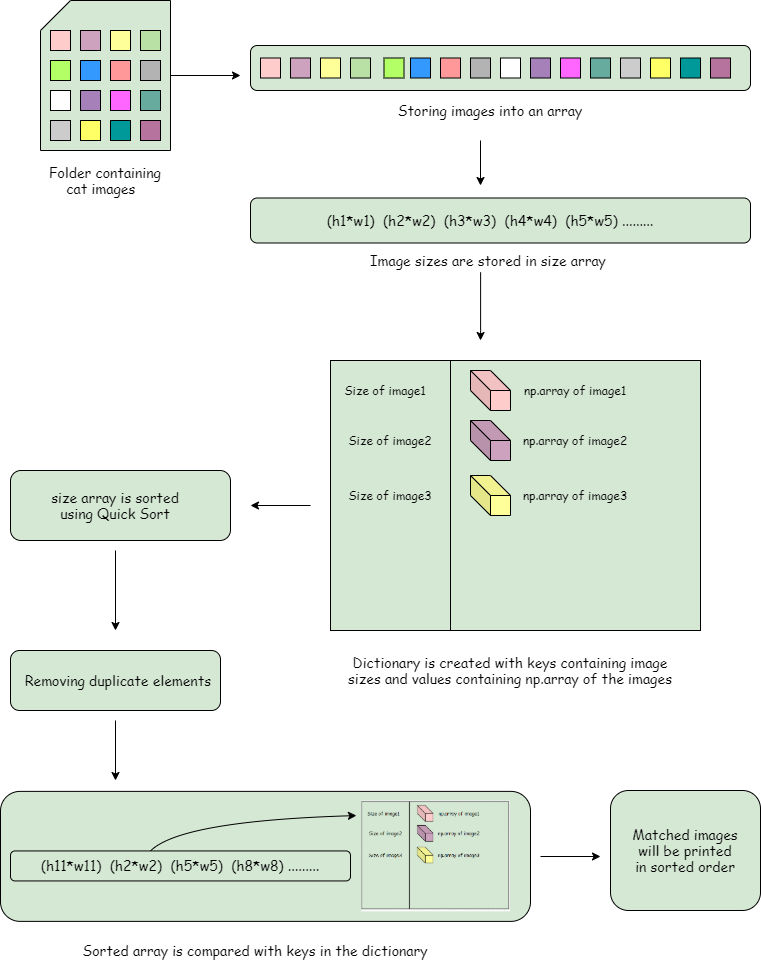



# Program
***
## Step:1 - Storing images into an array

In [ ]:
%%time
import cv2
import glob
import matplotlib.pyplot as plt
import  numpy as np

# Creating an empty list for storing images
img_data = []

#Providing path of the image folder
files = glob.glob("D:\Pictures\cats\*.JPG")

for myFile in files:
    print(myFile)
    image = cv2.imread(myFile)                   # Here imread is used to load an image from provided path
    img_data.append(image)                       # Appends image to the list
    print("Image shape: ", image.shape)          # shape command gives the dimensions of the image [(height,width,color(3))]
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # In Opencv, by default image is displayed in BGR format,hence changing it to RGB format
    plt.imshow(img)                              # For plotting image
    plt.show()                                
    #print(np.array(img))
    


## Step:2 - Storing image sizes into another array

In [ ]:
%%time
from PIL import Image

# Declaring an empty list to store image sizes
img_size = []

files = glob.glob("D:\Pictures\cats\*.JPG")
for myFile in files:
    im = Image.open(myFile)                 #path to image file
    width, height = im.size                 #Storing width and height of each image into variables called 'width','height' 
    resolution = width*height               #Calculating resolution for each image
    img_size.append(resolution)             #Adding resolution values into our created list
    
print(img_size)

## Step:3 - Creating a dictionary with image sizes and image arrays

In [ ]:
%%time
#Creating a dictionary which takes multiple values for same key and stores in a list corresponding to that key

from collections import defaultdict

res_dict = defaultdict(list)                  # defaultdict is created with the values that are 'list'
for Key, Value in zip(img_size,img_data):     # zip(a,b) pairs elements in a with elements in b
    res_dict[Key].append(Value)               # Adding key and values into our created dictionary
    
print(dict(res_dict))

## Step:4 - Sorting image sizes using Quick sort

In [ ]:
%%time
def partition(arr, low, high):
    i = (low-1)          # index of smaller element
    pivot = arr[high]    # pivot as last element

    for j in range(low, high):

        # If current element is smaller than or equal to pivot
        if arr[j] <= pivot:

            # increment index of smaller element
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)


# The main function that implements QuickSort
# arr[] --> Array to be sorted,
# low --> Starting index,
# high --> Ending index

def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:

        # pi is partitioning index, arr[p] is now at right place
        pi = partition(arr, low, high)

        # Separately sort elements before partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)

        
#Main code to sort image sizes
n = len(img_size)
quickSort(img_size, 0, n-1)
print("Sorted size of images is:")
for i in range(n):
    print("%d" % img_size[i]),


## Step:5 - Remove duplicate elements from image sizes array

In [ ]:
%%time
#Remove duplicate sizes from image sizes
def remove(duplicate):
    final = []                       # Creating an empty list to store final result
    for size in duplicate:           # Loop for iterating through sizes and stores only unique elements
        if size not in final:
            final.append(size)
    return final


final_size = remove(img_size)
print("Image sizes after removing duplicates:\n", final_size)


## Step:6 - Compare sorted array of image sizes with the keys in dictionary and display images in                    sorted fashion

In [ ]:
%%time
# Sorting images and displaying

#Seperating keys and values from our created dictionary
key = list(res_dict.keys())
val = list(res_dict.values())

#print("Printing keys: ", key)
#print("Printing values: ", val)

print("Images after sorting:\n\n")
for j in range(len(final_size)):                           
    for k in range(len(key)):
        if final_size[j] == key[k]:              # If the size in 'j' location in the sorted size array is matched with a key in 'k'th position
            print("Image size: ", final_size[j]) 
            print("Size matched")
            for item in val[k]:                  # Retrieve the list of images from the values stored in that matched key size
                Img = cv2.cvtColor(item, cv2.COLOR_BGR2RGB)
                plt.imshow(Img)
                plt.show()            


# Searching an image : 
***
## Flowchart:

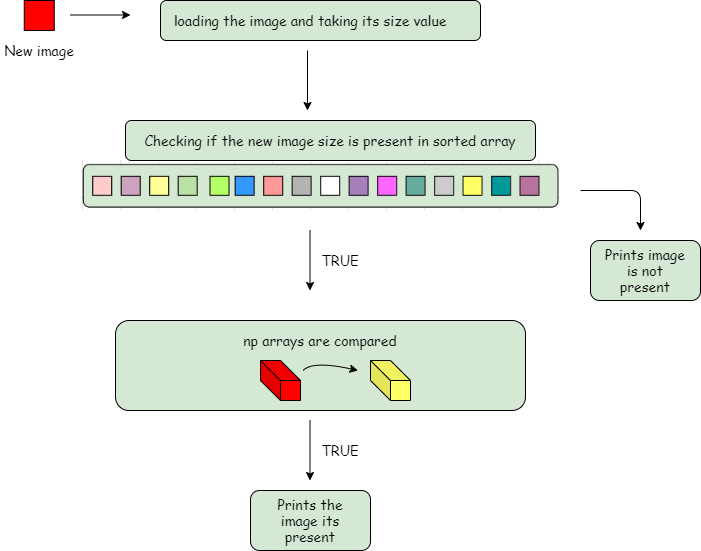

In [ ]:
%%time
import matplotlib.pyplot as plt 
import glob
import cv2

new_image = cv2.imread('Pictures/image3.jpg')    #Loads new image to be searched
print("Image to be seached is below:")
print("Dimensions of image: ", new_image.shape)
img = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB) #Converts the image to be searched from BGR to RGB
plt.imshow(img)                                  #Plots the image
plt.show()


# Declaring a variable flag to break from the loop if the searched item is found
flag = 0
print("Searching started:\n")
files = glob.glob("D:\Pictures\cats\*.JPG")
for myFile in files:
    search = cv2.imread(myFile) 
    if search.shape == new_image.shape:                     #Checking if dimensions are same
        print("\nMatching dimensions found at: ", myFile)
        print("Images have same shape...")
        print("Let's check if they have same pixel values")
        difference = cv2.subtract(search, new_image)        # Makes subtraction for each color(Red,Green,Blue) channel
        b, g, r = cv2.split(difference)                     # Splitting colors from the subtracted image  
        # Check if all the colors are black i.e..(0 - black ..... 255 - white)
        if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:     
            flag = 1
            print("\nYES! The images are completely EQUAL")
            found = cv2.cvtColor(search, cv2.COLOR_BGR2RGB)
            plt.imshow(found)
            plt.show()
        else:
            print("Pixel values are not same!\n")
    # If the searching image is found 
    elif flag == 1:
        break
    else:
        print("Image not found at: ", myFile)



# Time Complexity analysis:
***
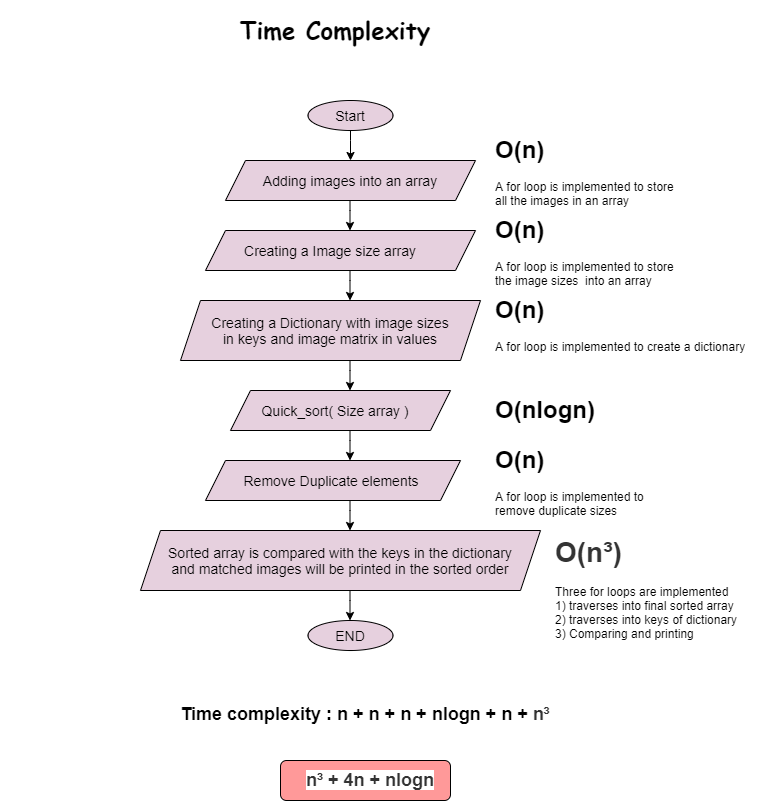

# List of references:
***
1. <a href="https://www.geeksforgeeks.org/defaultdict-in-python/" target="_blank">https://www.geeksforgeeks.org/defaultdict-in-python/</a>
2. <a href="https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays" target="_blank">https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays</a>
3. <a href="https://www.kite.com/python/answers/how-to-convert-a-numpy-array-to-an-image-in-python" target="_blank">https://www.kite.com/python/answers/how-to-convert-a-numpy-array-to-an-image-in-python</a>
4. <a href="https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/" target="_blank">https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/</a>
5. <a href="https://pysource.com/2018/07/19/check-if-two-images-are-equal-with-opencv-and-python/" target="_blank">https://pysource.com/2018/07/19/check-if-two-images-are-equal-with-opencv-and-python/</a>